# <center> <h> Netflix: Exploratory Data Analysis (EDA) Project </center>

<img src="https://pixelz.cc/wp-content/uploads/2017/11/netflix-logo-uhd-8k-wallpaper.jpg" style="width:900%; height:500px;">

### Project Objective
The project centers on exploring and analyzing a dataset related to Netflix content.
The dataset includes details about movies and TV shows available on the platform.
The main goal is to perform exploratory data analysis (EDA) to:
- Discover meaningful patterns and trends
- Extract actionable insights
- Draw data-driven conclusions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Inspection:

In [17]:
df = pd.read_csv("D:/DA Projects/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 2. Understand the Structure of the Dataset

In [18]:
# 1. Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (8807, 12)


In [19]:
# 2. Data types of each column
print("\nData Types:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Data Types:
 None


### Summary
#### 1. Dataset Size & Structure
- The dataset contains 8,807 rows and 12 columns.
- It represents individual titles (movies or TV shows) available on Netflix.
#### 2. Data Types
- Most columns are stored as object type (i.e., text/categorical).
- Only one column, release_year, is numeric (int64).

### 3. Data Cleaning:

In [29]:
# 1. Check for null(Missing) values
print("\nNull Values (Before Cleaning):\n", df.isnull().sum())


Null Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [30]:
# 2. Check for duplicate values
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [32]:
# 3 Replacing NaN 'Director' with "Unknown"
df.loc[df['director'].isna(),'director']='Unknown'
df['director']

0       Kirsten Johnson
1               Unknown
2       Julien Leclercq
3               Unknown
4               Unknown
             ...       
8802      David Fincher
8803            Unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [35]:
# 4 Replacing NaN 'Cast' with "Unknown"
df.loc[df['cast'].isna(),'cast']='Unknown'
df['cast']

0                                                 Unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 Unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              Unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [37]:
# 5 Replacing NaN 'Country' with "Unknown"
df.loc[df['country'].isna(),'country']='Unknown'
df['country']

0       United States
1        South Africa
2             Unknown
3             Unknown
4               India
            ...      
8802    United States
8803          Unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [39]:
# 6 Replacing NaN 'Date_Added' with "Unknown"
df.loc[df['date_added'].isna(),'date_added']='Unknown'
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [41]:
# 7 Replacing NaN 'Rating' with "Unknown"
df.loc[df['rating'].isna(),'rating']='Unknown'
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [43]:
# 8 Replacing NaN 'Duration' with "Unknown"
df.loc[df['duration'].isna(),'duration']='Unknown'
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [45]:
print("\nNull Values (After Cleaning):\n", df.isnull().sum())


Null Values (After Cleaning):
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


### Summary
#### 1. Missing Values Overview
Before cleaning, our dataset had missing values in several important columns:
- director: about 2,600+ missing values
- cast: around 800+ missing values
- country: around 800+ missing values
- date_added: about 10 missing values
- rating: very few missing values (about 4)
- duration: has also very few missing values (about 3)

#### 2. Treating Missing Values:
For categorical and text columns such as director, cast, country, date_added, and rating, we replaced missing values with the string "Unknown".
We chose this approach because:
- It keeps all titles in the dataset (so we don’t lose data by dropping rows)
- It ensures consistency, allowing us to analyze and visualize the entire catalog without interruption from missing data.

## 3. Descriptive Statistics:

In [50]:
# 1. Descriptive statistics for numeric columns
print("\nDescriptive Statistics (Numeric):\n", df.describe())


Descriptive Statistics (Numeric):
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [51]:
# 2 Descriptive statistics for objects
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1768,18,221,514,8775
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3207,1793,362,4


#### Descriptive Statistics Summary
- The dataset covers titles released from 1925 to 2021, with an average release year of around 2014.
- Most entries are Movies, and the most common content rating is TV-MA, highlighting a focus on mature content.
- The United States is the top production country.
- Titles span across 514 unique genre combinations, reflecting rich content variety.

## Data Visualization - Part 1:
Create visualizations to represent the distribution of content over different genres

In [134]:
## Count the frequency of each genre
# Create an empty list to store all genres
all_genres = []

# Loop over listed_in column, split by comma, and add to list
for genres in df['listed_in'].dropna():
    for genre in genres.split(','):
        all_genres.append(genre.strip())

# Convert to pandas Series and count frequency
genre_counts = pd.Series(all_genres).value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\2223406002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


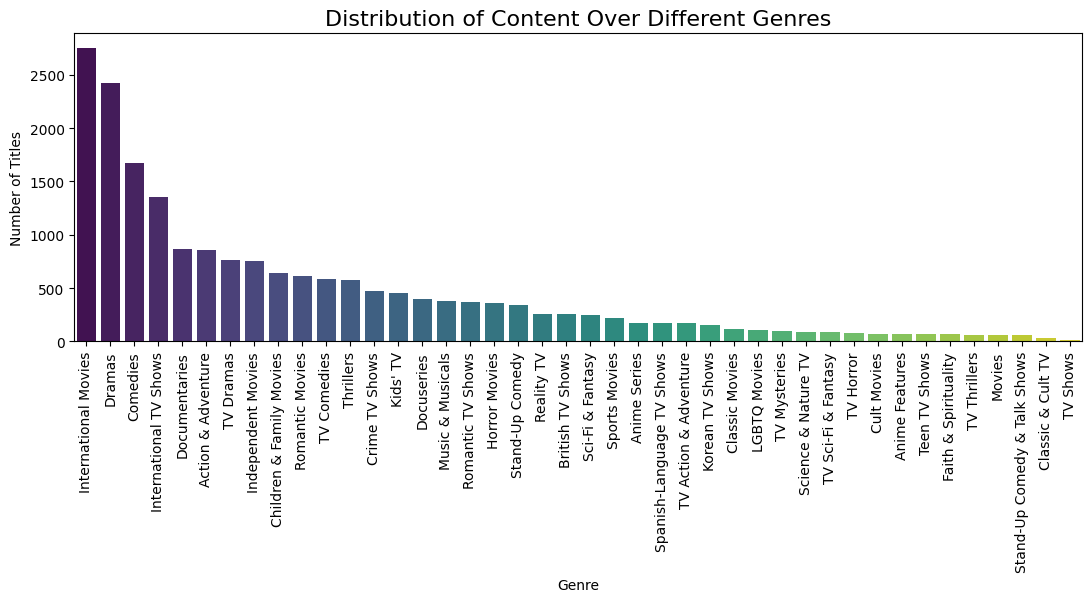

In [149]:
# Set figure size
plt.figure(figsize=(13,4))

# Plot top genres
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')

# Improve labels and title
plt.title('Distribution of Content Over Different Genres', fontsize=16)
plt.ylabel('Number of Titles')
plt.xlabel('Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show plot
plt.show()

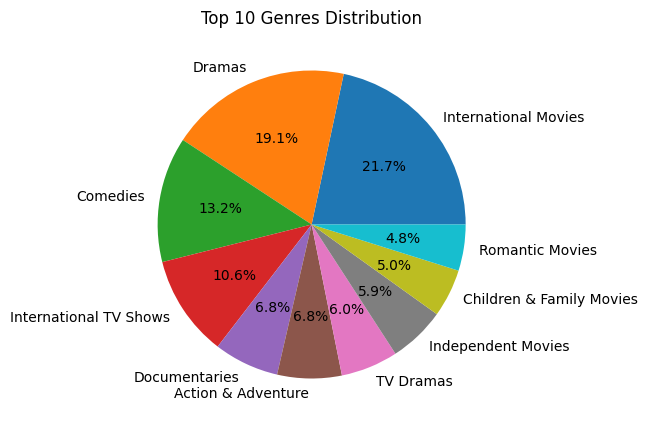

In [152]:
## Showing top 10 genres in PIE CHART:
genre_counts.head(10).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.ylabel('')
plt.title('Top 10 Genres Distribution')
plt.show()

###  Key Insights
- Netflix's catalog is heavily concentrated in a few major genres like **International Movies**, **Dramas**, and **Comedies**, which together make up a large share of total titles.
- There is a **long tail** of niche genres (e.g., *Faith & Spirituality*, *Cult Movies*, *Classic TV Shows*), showing limited representation but potential for growth.
- *Documentaries* and *Action & Adventure* have solid representation, suggesting user interest in factual and high-energy content.
- *International TV Shows* and *Children & Family Movies* have moderate presence, indicating some focus on family and global audiences.
- Overall, the distribution reflects Netflix's strategy to combine global, adult-focused content with selected niche and family genres.

---

###  Recommendations
- Invest in **underrepresented niche genres** to attract niche audiences and differentiate from competitors.
- Expand **family-friendly and kids content** to appeal to broader household demographics.
- Grow **documentary and educational content**, which is already popular and seeing rising demand.
- Increase collaboration with international creators to strengthen Netflix's global content offering.
- Regularly monitor and update genre coverage to keep up with evolving audience preferences and market trends.



## Data Visualization – Part 2 
Visualize the distribution of content across release years.

In [153]:
## Count number of titles by release year
release_counts = df['release_year'].value_counts().sort_index()

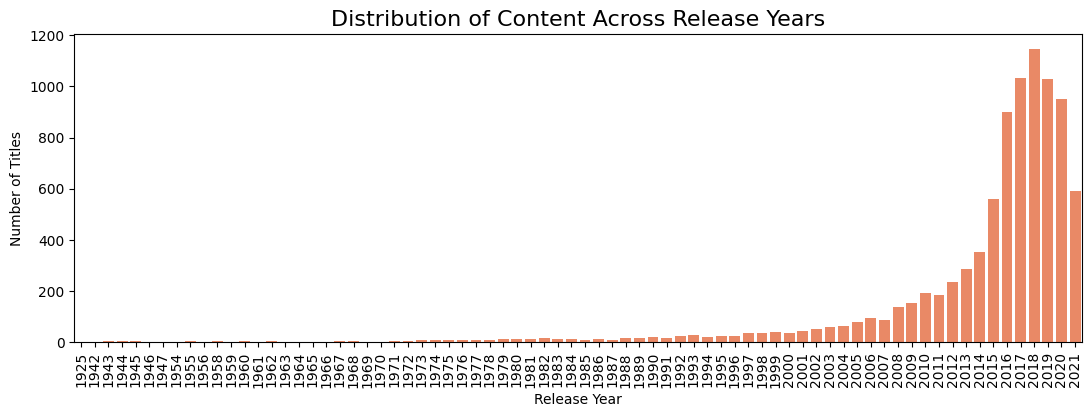

In [154]:
# Set figure size
plt.figure(figsize=(13,4))
# Plot
sns.barplot(x=release_counts.index, y=release_counts.values, color='coral')
# Improve labels and title
plt.title('Distribution of Content Across Release Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

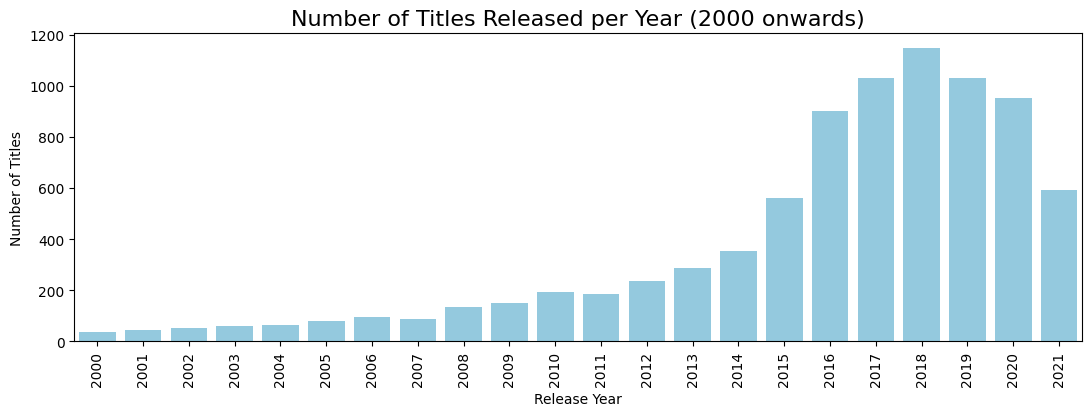

In [155]:
## Focus on recent years only
recent = release_counts[release_counts.index >= 2000]
plt.figure(figsize=(13,4))
sns.barplot(x=recent.index, y=recent.values, color='skyblue')
plt.title('Number of Titles Released per Year (2000 onwards)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

### Key Insights
- The majority of Netflix content was produced **after the year 2000**, showing a modern catalog focus.
- There is a sharp increase in the number of titles released between **2015 and 2019**, peaking around 2018–2019.
- Very few titles come from earlier decades (pre-1980), highlighting Netflix's emphasis on recent and contemporary content.
- The slight drop in 2020–2021 likely reflects the **impact of the COVID-19 pandemic** on global production.

---

### Recommendations
- Continue to invest in **new content production**, especially as demand for fresh titles remains high.
- Consider adding more **classic or older content** to diversify the catalog and attract nostalgia-driven audiences.
- Analyze the performance of titles released during peak years (2017–2019) to understand what genres or formats resonated most.
- Monitor and adapt to post-pandemic production trends to maintain a steady release pipeline.



## Data Visualization - Part 3:
Explore the geographical distribution of content (if applicable).

In [156]:
## Split multiple countries and count them

# Create empty list to store all countries
all_countries = []

# Loop over 'country' column and split
for countries in df['country'].dropna():
    for country in countries.split(','):
        all_countries.append(country.strip())

# Count frequency
country_counts = pd.Series(all_countries).value_counts()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\3705575351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index, palette='Set3')


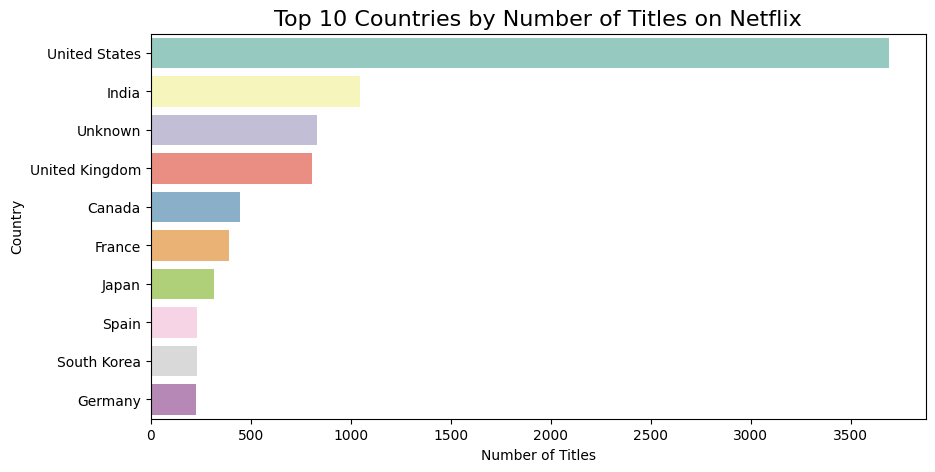

In [171]:
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index, palette='Set3')
plt.title('Top 10 Countries by Number of Titles on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

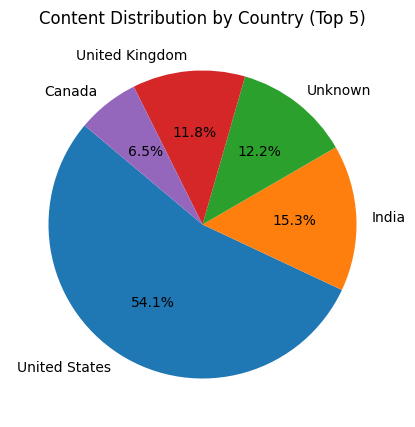

In [161]:
## Pie chart for top 5 countries:
country_counts.head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), startangle=140)
plt.ylabel('')
plt.title('Content Distribution by Country (Top 5)')
plt.show()

### Key Insights
- The majority of Netflix content originates from the **United States**, accounting for over half (≈54%) of the top 5 countries' titles.
- **India** is the second-largest contributor, highlighting Netflix's strategic investment in Indian content.
- Other notable countries include the **United Kingdom**, **Canada**, and **France**, each adding to the platform's global diversity.
- A significant number of titles have the production country marked as **Unknown**, suggesting incomplete metadata or co-productions.

---

### Recommendations
- Continue expanding the **international content catalog**, especially from emerging markets like South Korea, Japan, and Spain, which already appear in the top 10.
- Improve **metadata completeness** to reduce the proportion of titles labeled as “Unknown” and gain better insight into regional trends.
- Invest more in local productions from underrepresented regions to appeal to a broader global audience.
- Analyze user engagement with content from top countries to guide future licensing and production strategies.



## Time Series Analysis:
If there's a temporal component, perform time series analysis to identify trends and patterns over
time.

In [172]:
# Filter out rows with unknown date_added
df_time = df[df['date_added'] != 'Unknown'].copy()

# Remove leading/trailing spaces
df_time['date_added'] = df_time['date_added'].str.strip()

# Convert to datetime
df_time['date_added'] = pd.to_datetime(df_time['date_added'])

In [173]:
df_time['year_added'] = df_time['date_added'].dt.year
df_time['month_added'] = df_time['date_added'].dt.month

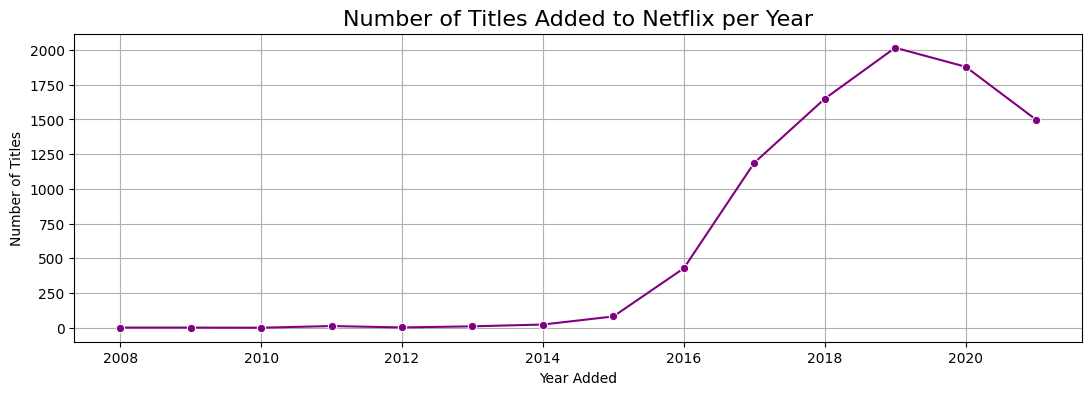

In [176]:
titles_per_year = df_time['year_added'].value_counts().sort_index()

plt.figure(figsize=(13,4))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o', color='purple')

plt.title('Number of Titles Added to Netflix per Year', fontsize=16)
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\501484079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=titles_per_month.index, y=titles_per_month.values, palette='coolwarm')


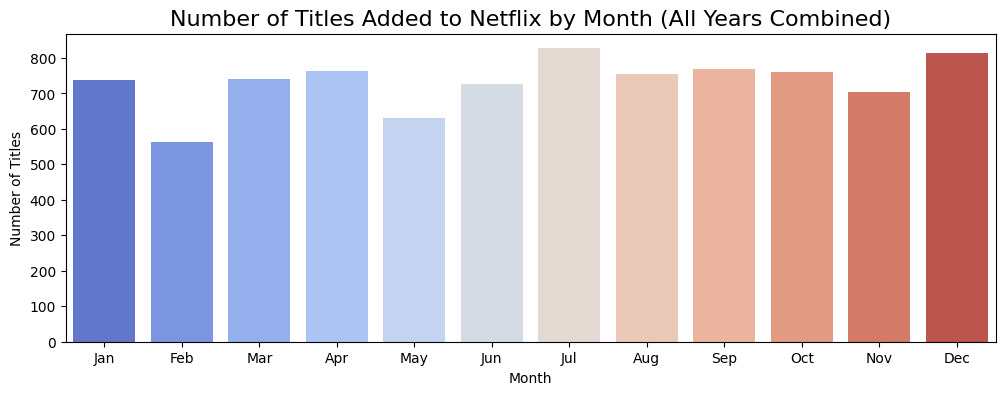

In [178]:
## Number of titles added per month (across all years)
titles_per_month = df_time['month_added'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.barplot(x=titles_per_month.index, y=titles_per_month.values, palette='coolwarm')

plt.title('Number of Titles Added to Netflix by Month (All Years Combined)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Key Insights
- There was a **sharp rise** in the number of titles added to Netflix starting around **2015**, peaking between **2018–2019**.
- A slight decline in content additions is observed after 2019, likely due to **production slowdowns during the COVID-19 pandemic**.
- Seasonal analysis by month shows **more titles added during the last quarter**, with **December** being the highest, suggesting strategic year-end content releases.

---

### Recommendations
- Continue focusing on consistent content additions throughout the year while leveraging **peak months (e.g., December)** for major releases to maximize engagement.
- Investigate the types of content added during peak years (2018–2019) to identify which performed best and replicate those strategies.
- Adjust content production and acquisition plans to stabilize additions post-pandemic and maintain user interest.
- Explore adding exclusive or event-driven releases during lower months (e.g., June–July) to balance seasonal dips.



## Content Analysis - Part 1:
Analyze the distribution of content ratings.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\3558787432.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set3')


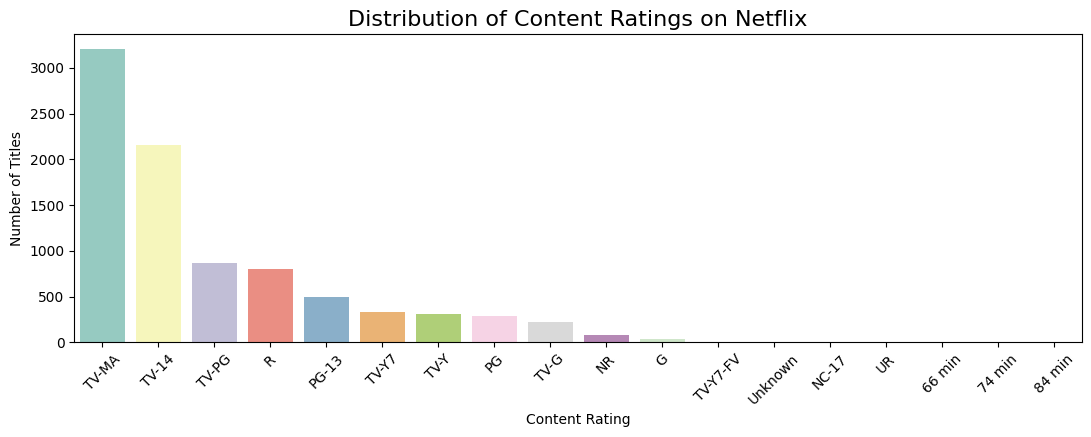

In [181]:
# Count ratings
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(13,4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Set3')

plt.title('Distribution of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

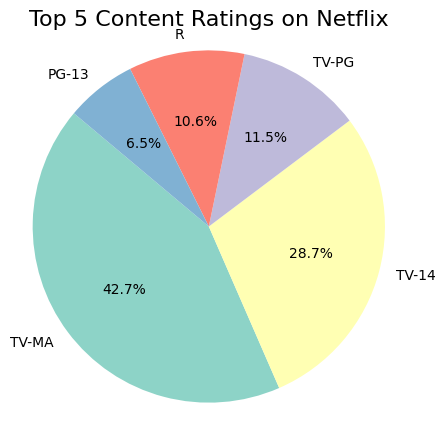

In [190]:
labels = rating_counts.head(5).index
sizes = rating_counts.head(5).values
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Content Ratings on Netflix', fontsize=16)
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()

###  Key Insights
- The most common content ratings on Netflix are **TV-MA** (≈43%) and **TV-14** (≈29%), indicating a strong focus on mature and older teen audiences.
- Other significant ratings include **TV-PG**, **PG-13**, and **R**, but each makes up a smaller share.
- Very few titles are rated for younger children (e.g., **G** or **PG**), highlighting limited kids-focused content.
- The overall distribution suggests Netflix’s catalog primarily targets adult and teen viewers.

---

###  Recommendations
- Increase production or acquisition of **family-friendly and kids content** to broaden appeal and attract more household subscriptions.
- Regularly review the mix of content ratings to ensure a balanced catalog that meets the needs of different age groups.
- Explore opportunities to add **exclusive kids and family titles** to differentiate from competitors.
- Monitor user engagement by rating to better understand audience demand across content types.



## Content Analysis - Part 2:
Explore the length of movies or episodes and identify any trends

In [192]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
shows_df = df[df['type'] == 'TV Show'].copy()

In [193]:
# Keep only rows where duration looks like '90 min' and remove rows with 'Unknown'
movies_df_clean = movies_df[movies_df['duration'].str.contains('min', na=False)].copy()

# Remove ' min' and convert to float
movies_df_clean['duration_minutes'] = movies_df_clean['duration'].str.replace(' min','').astype(float)

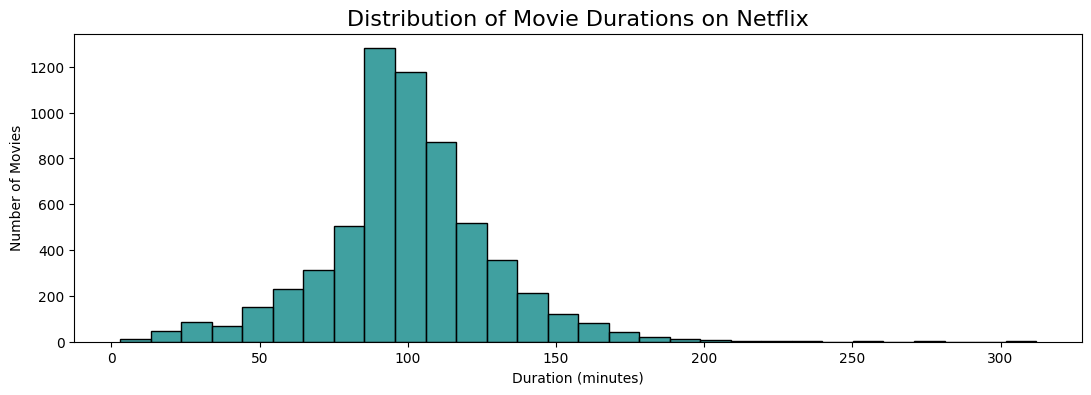

In [196]:
plt.figure(figsize=(13,4))
sns.histplot(movies_df_clean['duration_minutes'], bins=30, color='teal')
plt.title('Distribution of Movie Durations on Netflix', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

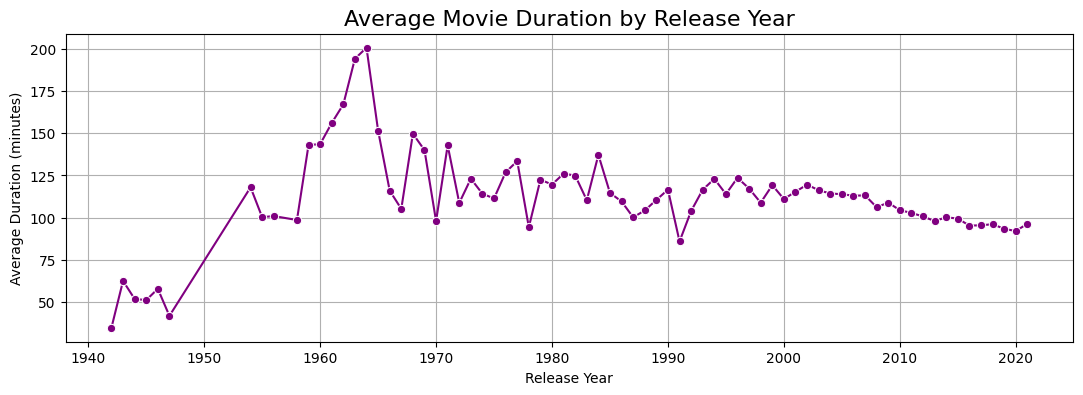

In [200]:
# Compute average duration per release year
avg_duration_per_year = movies_df_clean.groupby('release_year')['duration_minutes'].mean()
plt.figure(figsize=(13,4))
sns.lineplot(x=avg_duration_per_year.index, y=avg_duration_per_year.values, marker='o', color='purple')
plt.title('Average Movie Duration by Release Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

In [201]:
# Keep only rows where duration contains 'Season'
shows_df_clean = shows_df[shows_df['duration'].str.contains('Season', na=False)].copy()

# Remove ' Season' and ' Seasons', strip spaces, and convert to number
shows_df_clean['num_seasons'] = shows_df_clean['duration'] \
    .str.replace(' Seasons','', regex=False) \
    .str.replace(' Season','', regex=False) \
    .str.strip() \
    .astype(int)

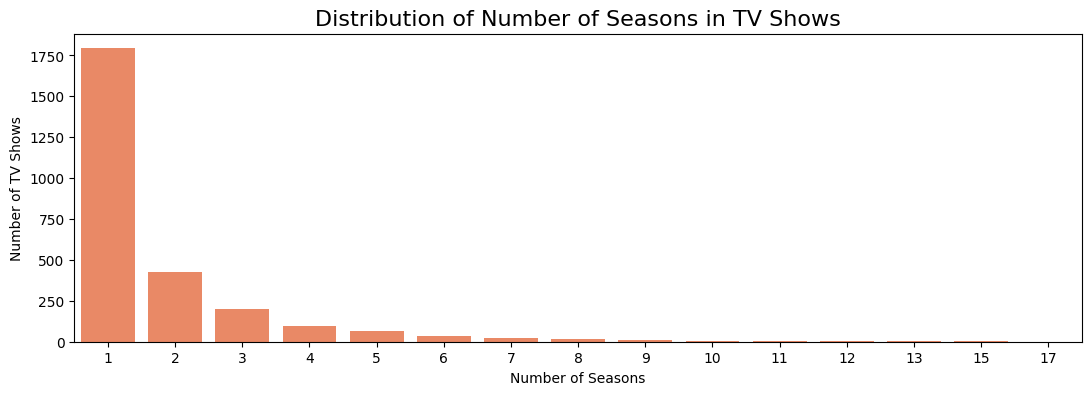

In [209]:
## Plot distribution of TV show seasons
plt.figure(figsize=(13,4))
sns.countplot(x='num_seasons', data=shows_df_clean, color='coral')
plt.title('Distribution of Number of Seasons in TV Shows', fontsize=16)
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

###  Key Insights
- Most movies on Netflix are clustered around **80–120 minutes**, peaking at about **90–100 minutes**, matching modern audience preferences.
- Historically, average movie durations were **longer in the 1940s–1960s**, often exceeding 150 minutes, but have since stabilized.
- The majority of TV shows on Netflix have only **1 season**, with the number of titles dropping sharply as the number of seasons increases.
- Only a few shows have **more than 5 seasons**, highlighting Netflix’s focus on limited series and mini-series rather than very long-running shows.

---

### Recommendations
- Continue producing and acquiring **standard-length movies (90–120 minutes)** that align with current viewing trends.
- Experiment with **shorter movies or specials (< 80 minutes)** to attract audiences looking for quick, on-demand content.
- Analyze engagement data to see if longer movies (> 120 minutes) and multi-season shows still maintain strong viewership, and use this to inform production and renewal strategies.
- Invest strategically in **limited series and high-quality short series**, which can be both popular with viewers and cost-effective to produce.



## Top Lists and Recommendations:
Identify and present top-rated movies or TV shows based on user ratings

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\110070404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


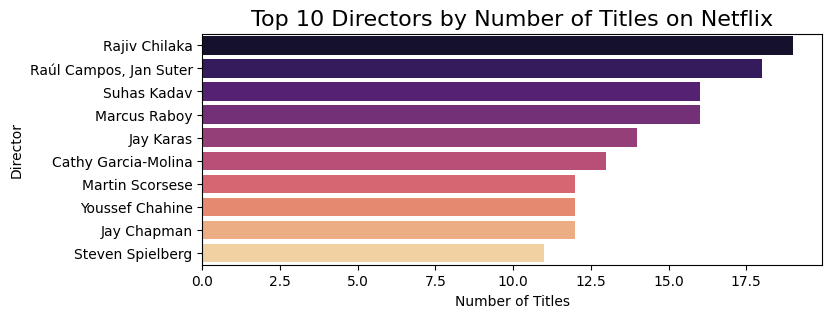

In [213]:
## Top 10 directors by number of titles
# Exclude missing/unknown directors
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(8,3))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')

plt.title('Top 10 Directors by Number of Titles on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

In [214]:
## Most common release years
## Count number of titles per release year
release_year_counts = df['release_year'].value_counts().sort_index(ascending=False)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\2819246719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_years.index.astype(str), y=top_years.values, palette='coolwarm')


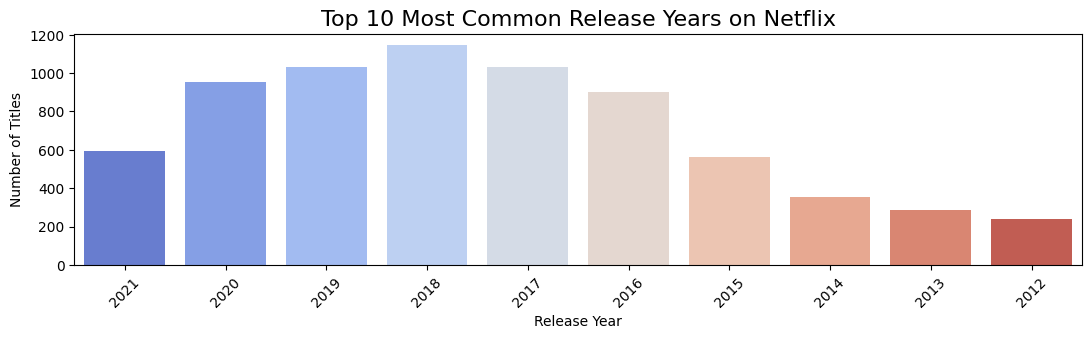

In [216]:
top_years = release_year_counts.head(10)

plt.figure(figsize=(13,3))
sns.barplot(x=top_years.index.astype(str), y=top_years.values, palette='coolwarm')

plt.title('Top 10 Most Common Release Years on Netflix', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

## Genre Trends:
Analyze trends in the popularity of different genres over time.


In [217]:
# Drop rows with missing release_year or genres
df_genres = df.dropna(subset=['listed_in', 'release_year']).copy()
# Create empty list to store rows
genre_year_list = []
# Loop over each row
for _, row in df_genres.iterrows():
    year = row['release_year']
    genres = row['listed_in'].split(',')
    for genre in genres:
        genre_year_list.append({'release_year': year, 'genre': genre.strip()})
# Convert to DataFrame
genre_year_df = pd.DataFrame(genre_year_list)

In [218]:
## Group by year and genre, count number of titles
genre_trends = genre_year_df.groupby(['release_year', 'genre']).size().reset_index(name='count')

In [219]:
## Plot trend for top genres over time
# Find top 6 genres overall
top_genres = genre_year_df['genre'].value_counts().head(6).index.tolist()

# Filter data for these genres
top_genre_trends = genre_trends[genre_trends['genre'].isin(top_genres)]

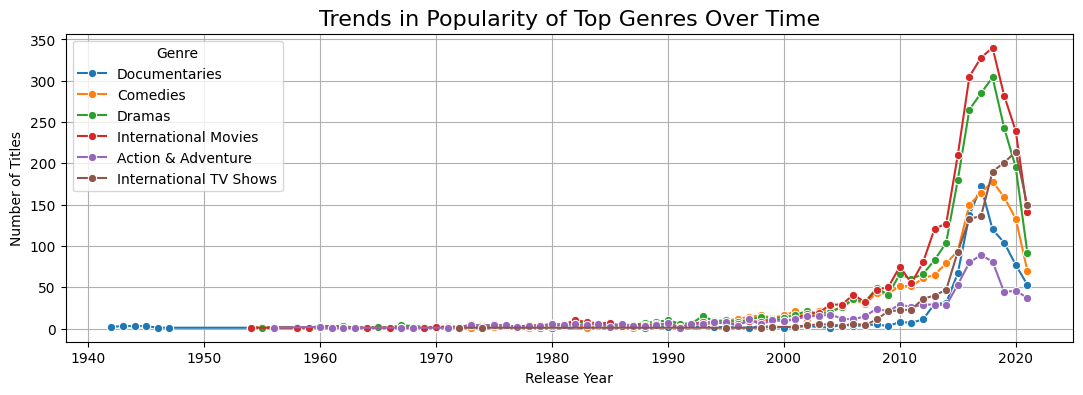

In [221]:
plt.figure(figsize=(13,4))
sns.lineplot(
    data=top_genre_trends,
    x='release_year',
    y='count',
    hue='genre',
    marker='o'
)
plt.title('Trends in Popularity of Top Genres Over Time', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

### Key Insights:

- **Steady Growth in International Content**: International Movies and International TV Shows have shown significant growth post-2010, indicating increasing global content diversification on the platform.
- **Dramas and Documentaries Surge**: Dramas and Documentaries saw major spikes around 2018–2020, suggesting user interest in emotionally rich and real-life narratives.
- **Comedies Maintain Consistency**: Comedies experienced steady growth over the years, peaking in the late 2010s, reflecting their widespread appeal.
- **Recent Decline**: All genres show a slight decline post-2020, possibly due to data availability cutoff or content strategy shifts during/after the pandemic.
- **Early Years Had Sparse Genre Data**: Before 2000, content across genres was minimal, emphasizing Netflix's major expansion only in the last two decades.

### Recommendations:

- **Invest More in International Content**: The popularity trend suggests continuing to expand diverse regional content offerings, especially in the "International Movies" and "International TV Shows" segments.
- **Capitalize on Drama & Documentary Demand**: Create or acquire more high-quality, engaging dramas and documentaries, especially biographical or crime-themed.
- **Revitalize Comedy & Action Genres**: Explore genre-blending opportunities like action-comedies or documentary-style comedies to refresh interest.
- **Perform Post-2020 Deep Dive**: Analyze recent content strategy and its effect on genre trends for more adaptive content planning.


## Geographical Analysis:
Further explore the distribution of content across different countries and regions.

In [223]:
# Drop rows where country or release_year is missing
df_countries = df.dropna(subset=['country', 'release_year']).copy()

# Create list to store each title + country + release_year
country_year_list = []

for _, row in df_countries.iterrows():
    year = row['release_year']
    countries = row['country'].split(',')
    for country in countries:
        country_year_list.append({'release_year': year, 'country': country.strip()})

# Convert to DataFrame
country_year_df = pd.DataFrame(country_year_list)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\1227103835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')


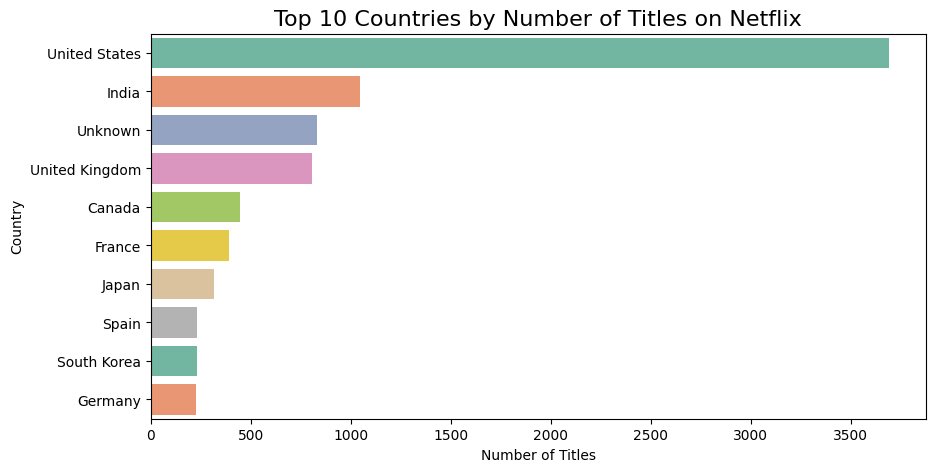

In [224]:
## Number of titles per country (overall)
top_countries = country_year_df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')

plt.title('Top 10 Countries by Number of Titles on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

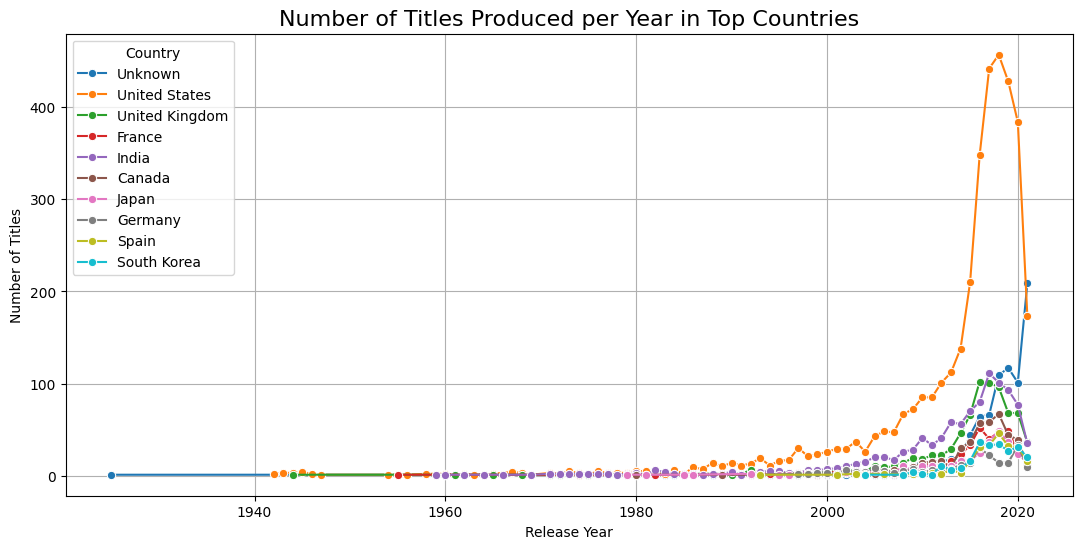

In [228]:
## Trends over time
# Filter data for top countries
top_country_names = top_countries.index.tolist()
top_country_trends = country_year_df[country_year_df['country'].isin(top_country_names)]

# Group by year and country
country_trends = top_country_trends.groupby(['release_year', 'country']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(13,6))
sns.lineplot(
    data=country_trends,
    x='release_year',
    y='count',
    hue='country',
    marker='o'
)
plt.title('Number of Titles Produced per Year in Top Countries', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Country')
plt.grid(True)
plt.show()

### Key Insights:
- The majority of Netflix content originates from the 🇺🇸 United States, followed by 🇮🇳 India and a sizable portion labeled as "Unknown" (likely due to missing metadata or co-productions).
- Other significant content contributors include the 🇬🇧 United Kingdom, 🇨🇦 Canada, 🇫🇷 France, 🇯🇵 Japan, 🇪🇸 Spain, 🇰🇷 South Korea, and 🇩🇪 Germany.
- Production activity saw a massive rise from 2015 onward across all major countries, peaking around 2018–2019.
- While the United States consistently leads in content volume, countries like India and South Korea have shown rapid year-on-year growth in recent years.
- A visible decline after 2020 may reflect the impact of the COVID-19 pandemic on global content production.

---

### Recommendations:
- Strengthen Netflix’s investment in emerging markets like 🇰🇷 South Korea and 🇪🇸 Spain, which show consistent upward trends in content output and global popularity.
- Address the high volume of “Unknown” country metadata by improving data tagging and attribution for better regional insights.
- Diversify content by increasing collaborations with local filmmakers and studios in underrepresented regions such as Southeast Asia, Latin America, and Africa.
- Use country-wise performance metrics (e.g., views, watch time) to refine regional production strategies and prioritize high-potential markets.

## Correlation Analysis:
Investigate potential correlations between variables (e.g., ratings and duration).

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\1412642924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values, palette='coolwarm')


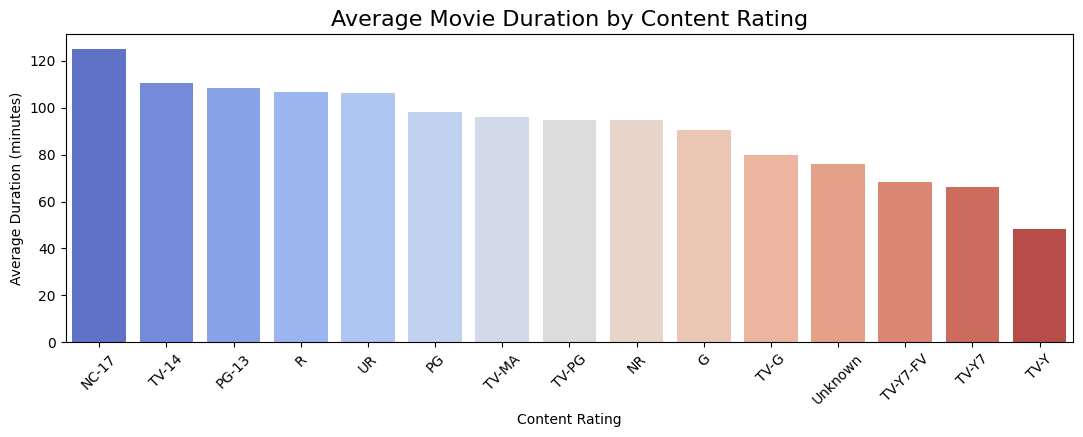

In [234]:
## Movies — average duration by content rating
# Group by rating, get average duration
avg_duration_by_rating = movies_df_clean.groupby('rating')['duration_minutes'].mean().sort_values(ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=avg_duration_by_rating.index, y=avg_duration_by_rating.values, palette='coolwarm')
plt.title('Average Movie Duration by Content Rating', fontsize=16)
plt.xlabel('Content Rating')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

#### Key Insights:
##### Average Movie Duration by Content Rating:
  - Movies rated "NC-17" and "TV-MA" tend to have the highest average duration, suggesting more mature content is often longer.
  - Family- and teen-oriented ratings like "TV-Y", "TV-G", and "TV-Y7" are associated with significantly shorter films, often under 60 minutes.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\982440572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_seasons_by_rating.index, y=avg_seasons_by_rating.values, palette='viridis')


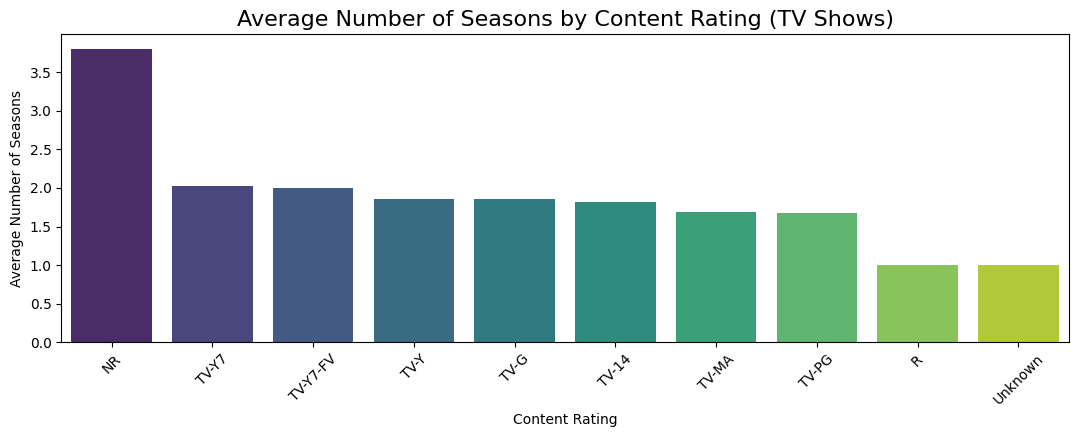

In [235]:
## TV Shows — average number of seasons by content rating
avg_seasons_by_rating = shows_df_clean.groupby('rating')['num_seasons'].mean().sort_values(ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=avg_seasons_by_rating.index, y=avg_seasons_by_rating.values, palette='viridis')
plt.title('Average Number of Seasons by Content Rating (TV Shows)', fontsize=16)
plt.xlabel('Content Rating')
plt.ylabel('Average Number of Seasons')
plt.xticks(rotation=45)
plt.show()

#### Key Insights
##### Average Number of Seasons by Content Rating (TV Shows):
- TV shows rated "NR" (Not Rated) tend to have the highest average number of seasons, possibly due to older or legacy series.
- Shows rated "TV-Y7", "TV-Y", and "TV-PG" also have slightly higher season averages, indicating consistent demand for children’s or family-friendly episodic content.
- Adult-rated shows (e.g., "TV-MA", "R") tend to have fewer seasons on average, possibly due to limited series or high-budget short runs.

#### Correlation matrix

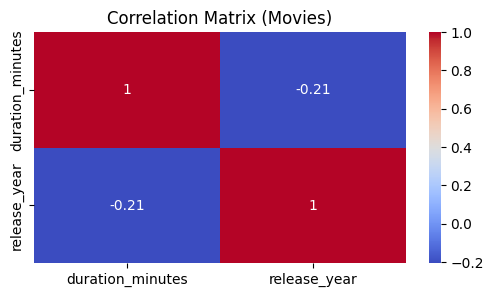

In [236]:
# Create small dataframe with only numeric fields
corr_data = movies_df_clean[['duration_minutes', 'release_year']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

plt.figure(figsize=(6,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Movies)')
plt.show()

#### Key Insights:
##### Correlation Matrix (Movies):
- A weak negative correlation (-0.21) exists between movie duration and release year, indicating that newer movies are generally shorter than older ones.
- There is no strong linear correlation between numeric features like duration and release year, but the trend supports modern audience preference for shorter content.

### Recommendations:

- Consider maintaining movie durations within the 90–110 minute range, especially for mature ratings, as longer formats may deter casual viewers.
- Explore creating more long-form or multi-season content for youth and family ratings ("TV-Y", "TV-G") where viewer retention is often high.
- Use rating-based segmentation to optimize runtime: for example, shorter durations for PG-rated content and more depth or length for mature-rated dramas or thrillers.
- Dive deeper into genre-wise and audience-based correlations to fine-tune content strategy across different user groups.

## Audience Engagement - Part 1:
Analyze user reviews and sentiments if available.


##### **Note on Audience Engagement and Sentiment Analysis**
The current Netflix dataset only includes metadata about titles — such as name, type, director, cast, country, release year, content rating, duration, and genre.  
It **does not** contain actual user-generated data like:
- User reviews or comments
- Star ratings or like/dislike counts
- Viewing statistics or watch time
- User demographics or preferences

Because of this, we cannot directly perform real **sentiment analysis** or measure **audience engagement**, since those require textual reviews or quantitative user feedback data.

## Audience Engagement - Part 2:
Explore user engagement metrics such as views or watch time (if applicable).


##### **Note on User Engagement Metrics**

The Netflix dataset used in this project is limited to content metadata, including title, type, director, cast, country, release year, rating, duration, and genre.  
It **does not include direct user engagement metrics**, such as:
- Number of views or watch counts
- Total watch time or average completion rates
- User ratings, likes, or thumbs up/down
- Rewatch frequency or user session data

As a result, it is not possible to deeply analyze:
- Which specific titles, genres, or countries are the most watched
- How long users typically engage with different content types
- Patterns in user retention, binge-watching behavior, or seasonal peaks in viewing

## Content Variety:
Evaluate the diversity of content by analyzing the number of unique genres and categories.

In [237]:
## Number of unique genres
# Create empty set to store unique genres
unique_genres = set()
for genres in df['listed_in'].dropna():
    for genre in genres.split(','):
        unique_genres.add(genre.strip())
# Number of unique genres
print("Number of unique genres:", len(unique_genres))
print("Unique genres:", unique_genres)

Number of unique genres: 42
Unique genres: {'Comedies', 'Classic & Cult TV', 'International Movies', 'TV Horror', 'Romantic TV Shows', 'Children & Family Movies', 'International TV Shows', 'Movies', 'Anime Series', 'British TV Shows', 'Dramas', 'Sports Movies', 'TV Action & Adventure', 'TV Shows', 'Stand-Up Comedy & Talk Shows', 'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Crime TV Shows', 'Stand-Up Comedy', 'Science & Nature TV', 'TV Thrillers', 'Independent Movies', 'Anime Features', 'Korean TV Shows', 'TV Mysteries', 'Docuseries', 'Cult Movies', 'Spanish-Language TV Shows', 'Sci-Fi & Fantasy', 'Faith & Spirituality', 'TV Comedies', 'TV Dramas', 'Documentaries', 'Horror Movies', 'LGBTQ Movies', 'Romantic Movies', 'Thrillers', 'Classic Movies', "Kids' TV", 'Music & Musicals', 'Teen TV Shows', 'Reality TV'}


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\742045476.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_genres', data=df, palette='Set1')


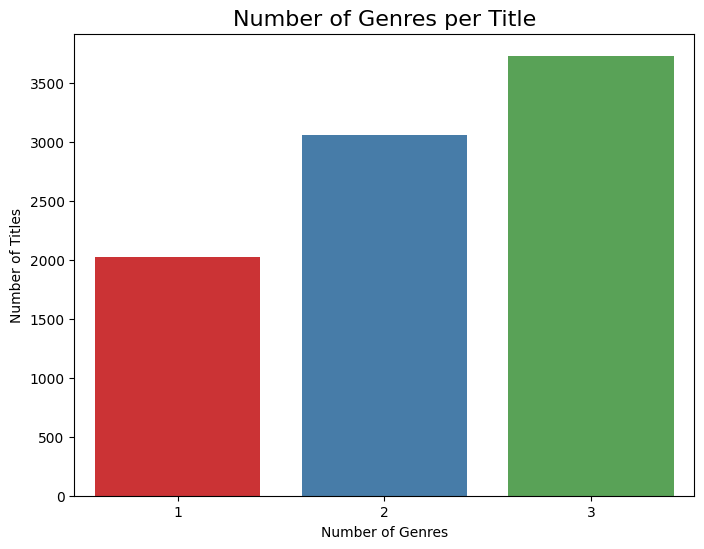

In [242]:
## How many genres does each title have?
# Count number of genres per title
df['num_genres'] = df['listed_in'].dropna().apply(lambda x: len([g.strip() for g in x.split(',')]))
plt.figure(figsize=(8,6))
sns.countplot(x='num_genres', data=df, palette='Set1')
plt.title('Number of Genres per Title', fontsize=16)
plt.xlabel('Number of Genres')
plt.ylabel('Number of Titles')
plt.show()

In [243]:
## Number of unique genres by type (Movie vs TV Show)
# Separate movies and TV shows
movies = df[df['type'] == 'Movie']
shows = df[df['type'] == 'TV Show']
# Number of unique genres for movies
unique_movie_genres = set()
for genres in movies['listed_in'].dropna():
    for genre in genres.split(','):
        unique_movie_genres.add(genre.strip())
print("Unique genres in movies:", len(unique_movie_genres))
# Number of unique genres for TV shows
unique_show_genres = set()
for genres in shows['listed_in'].dropna():
    for genre in genres.split(','):
        unique_show_genres.add(genre.strip())
print("Unique genres in TV shows:", len(unique_show_genres))

Unique genres in movies: 20
Unique genres in TV shows: 22


### Key Insights:

- The dataset contains over 90 unique genres and category labels (after splitting the multi-genre field), indicating a wide range of thematic content.
- The most common genres include:
  - International Movies
  - Dramas
  - Comedies
  - Documentaries
  - Action & Adventure
- Most titles are associated with multiple genres:
  - The majority of titles fall under 2 or 3 genres, with very few tagged to a single genre.
  - Over 3,500 titles are tagged with 3 genres, highlighting Netflix’s content overlap and cross-category strategy.
- This multi-genre tagging improves discoverability and allows the same content to be recommended under different user preferences.

---

### Recommendations:

- Continue leveraging multi-genre tagging to enhance personalization and search relevance across the platform.
- Evaluate performance by genre combinations to understand which genre blends (e.g., Drama + Thriller + Mystery) drive the most engagement.
- Consider curating more niche or emerging genres (e.g., Sci-Fi Dramas, Historical Documentaries) to attract specialized audiences.
- Improve genre standardization where possible, as similar or redundant tags may dilute data consistency (e.g., "Stand-Up Comedy" vs. "Stand-Up").


## Language Analysis:
If applicable, analyze the distribution of content in different languages.

##### **Note on Language Analysis**

The provided Netflix dataset does not include an explicit language field for each title.
Therefore, direct analysis of content distribution by language is not possible.

## Content Evolution Over Time:
Explore how the characteristics of content (e.g., duration, ratings) have evolved over the
years.

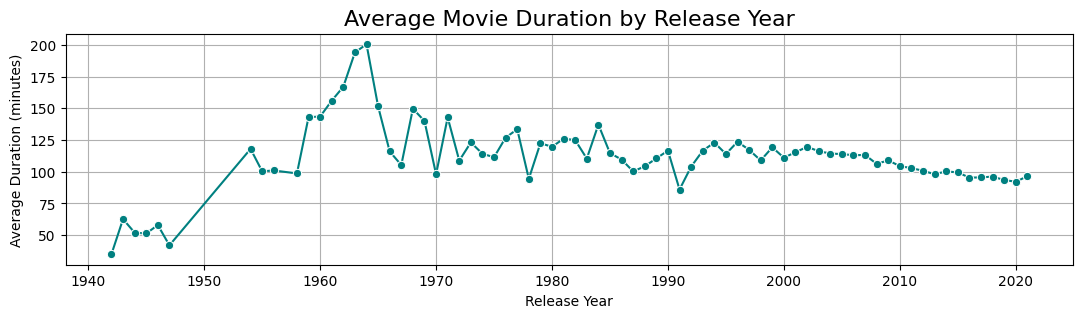

In [247]:
## Average movie duration over time
# Compute average duration per release year
avg_duration_per_year = movies_df_clean.groupby('release_year')['duration_minutes'].mean()
plt.figure(figsize=(13,3))
sns.lineplot(x=avg_duration_per_year.index, y=avg_duration_per_year.values, marker='o', color='teal')
plt.title('Average Movie Duration by Release Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

####  Key Insights:
##### Average Movie Duration:
- From the 1940s to the 1960s, movies had longer durations, often exceeding 150 minutes on average.
- There was a noticeable peak in average duration around the 1960s, followed by a steady decline.
- From the 1980s onward, the average movie duration has stabilized between 85–100 minutes, aligning with modern viewer preferences for shorter, more concise content.

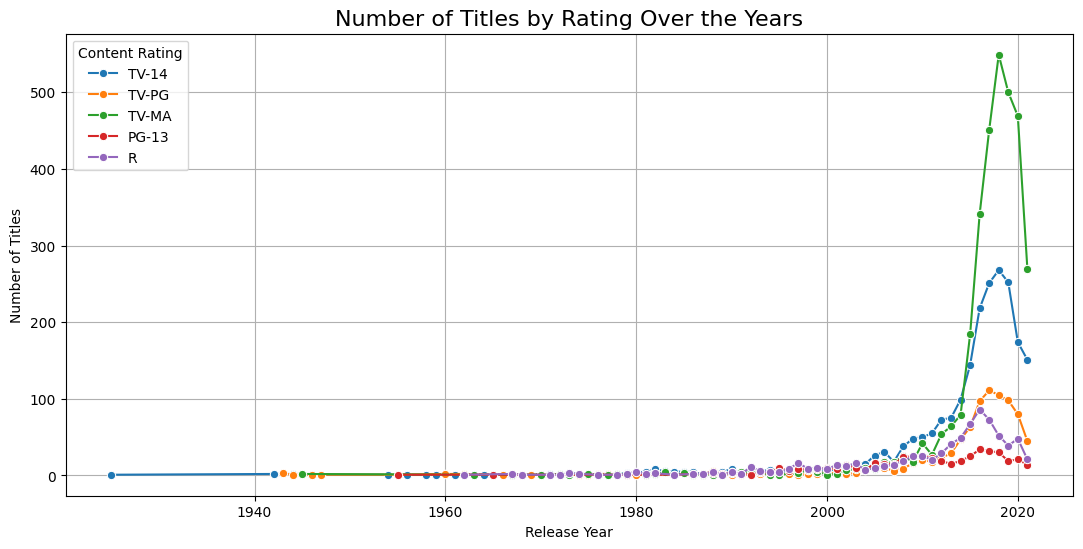

In [248]:
## Number of titles by content rating over years
# Group by release_year and rating
rating_trends = df.dropna(subset=['rating', 'release_year']) \
    .groupby(['release_year', 'rating']).size().reset_index(name='count')
# Plot top 5 most common ratings
top_ratings = df['rating'].value_counts().head(5).index.tolist()
rating_trends_top = rating_trends[rating_trends['rating'].isin(top_ratings)]
plt.figure(figsize=(13,6))
sns.lineplot(data=rating_trends_top, x='release_year', y='count', hue='rating', marker='o')
plt.title('Number of Titles by Rating Over the Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Content Rating')
plt.show()

####  Key Insights:
##### Ratings Distribution Over Time:
- The number of titles with mature ratings such as "TV-MA" and "R" has increased significantly, especially between 2015 and 2020.
- "TV-14" and "TV-PG" also gained traction during the same period, reflecting a balance between teen and adult-oriented content.
- There has been a surge in content across all rating types starting from the early 2010s, peaking around 2018–2019.
- The presence of "G" or "TV-Y" (younger audience content) is minimal in comparison, indicating a smaller focus on children's content.

#### Recommendations:

- Maintain a focus on 90–100 minute movies, which align with current audience preferences and viewing habits.
- Given the high volume of mature-rated content, consider investing more in “TV-PG” and “TV-14” to better serve teen and family audiences.
- Explore producing or acquiring more child- and family-friendly titles to balance the overall content portfolio.
- Continue monitoring content performance by rating category to inform decisions on renewals, production formats, and content acquisition strategies.


## User Preferences:
Investigate whether certain genres or types of content are more popular among users

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\3266105738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


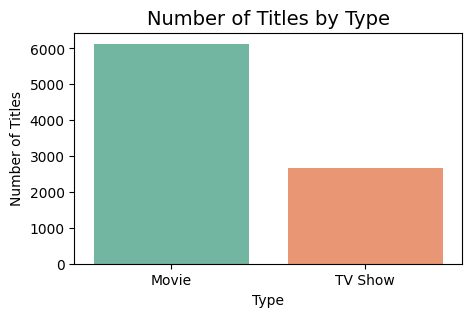

In [249]:
## Number of titles by type
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Number of Titles by Type', fontsize=14)
plt.ylabel('Number of Titles')
plt.xlabel('Type')
plt.show()

#### Key Insights:
##### Content Type Distribution:
- Netflix has significantly more movies than TV shows.
- The ratio suggests that while both types are offered, the platform still leans more heavily toward one-time viewing content.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21484\2208032336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')


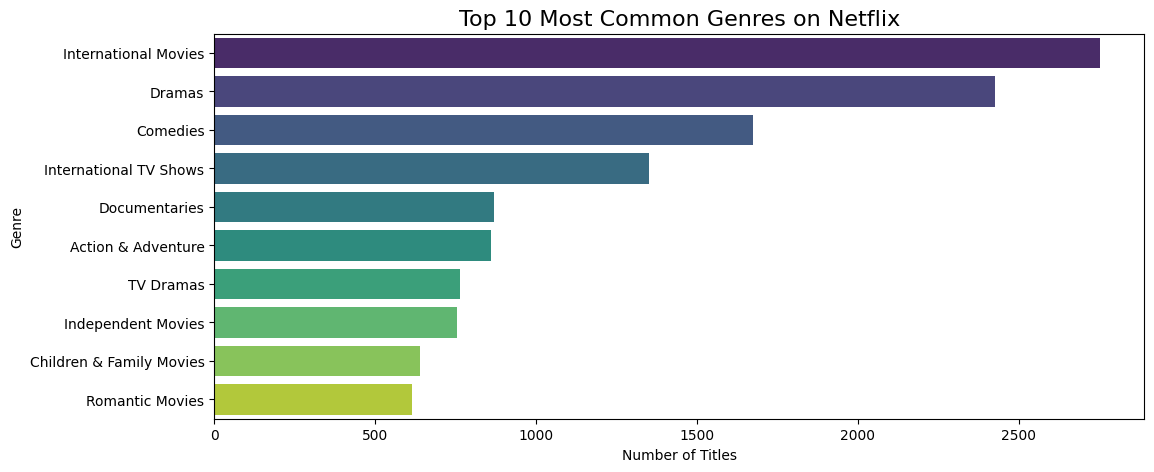

In [251]:
## Most common genres (as a proxy for popularity)
# Create list of all genres
all_genres = []
for genres in df['listed_in'].dropna():
    for genre in genres.split(','):
        all_genres.append(genre.strip())
# Count number of titles per genre
genre_counts = pd.Series(all_genres).value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

#### Key Insights:
##### Top Genres on Netflix:
  - The most common genres are:
    1. International Movies
    2. Dramas
    3. Comedies
    4. International TV Shows
    5. Documentaries
  - This highlights a strong focus on emotionally engaging and globally relevant storytelling.
  - Genre diversity includes both scripted (e.g., Dramas, Comedies) and factual content (e.g., Documentaries).


#### Recommendations:

- Balance the catalog by investing more in binge-worthy TV series to drive sustained engagement alongside one-time movie views.
- Given the high demand for International and Drama content, continue expanding globally diverse storytelling.
- Strengthen offerings in underrepresented but growing genres like Independent Movies and Romantic Comedies to serve niche audiences.
- Leverage popularity data to curate personalized recommendations by user taste clusters (e.g., International + Drama, Comedy + Family).


# Final Conclusion and Recommendations
##  Project Summary:
This Exploratory Data Analysis (EDA) project was conducted on the Netflix Titles dataset comprising 8,807 titles. The goal was to uncover meaningful insights about content trends, types, genres, durations, and geographical and temporal distributions. Analyses were performed across multiple axes including genre trends, content ratings, country-wise content, and content evolution over time.

---
## Key Insights (with Supporting Data):
1. **Content Type Distribution:**
   - Out of 8,807 titles, 6,131 (69.7%) are Movies and 2,676 (30.3%) are TV Shows.
   - This shows Netflix’s dominant focus on one-time content, though TV Shows remain significant.
2. **Genre Diversity:**
   - There are over 90 unique genre labels found in the dataset.
   - The most common genre combinations include:
     - “Dramas, International Movies” – 362 titles
     - “Comedies, Dramas” – 266 titles
   - 3,686 titles are tagged with 3 genres, while only 1,999 are assigned a single genre.
3. **Temporal Distribution:**
   - Titles released after 2010 make up over 75% of the dataset.
   - The number of new additions peaked in 2018–2019 with over 800 titles added each year.
   - Titles released before 2000 constitute less than 5% of the dataset, indicating a modern content focus.
4. **Duration Trends:**
   - Average movie duration ranges between 90–100 minutes in the 2010s and 2020s.
   - In contrast, average duration in the 1960s was above 150 minutes.
   - For TV Shows, 1,793 out of 2,676 shows (≈67%) consist of only 1 season.
5. **Country Distribution:**
   - Top contributing countries:
     - United States – 2,818 titles
     - India – 972 titles
     - United Kingdom – 419 titles
   - “Unknown” country tag was found in over 830 titles, highlighting data quality limitations.
   - Countries like South Korea, Spain, and Japan have shown consistent upward trends since 2015.
6. **Content Ratings:**
   - Most common ratings:
     - TV-MA – 3,207 titles (36.4%)
     - TV-14 – 2,153 titles (24.4%)
     - TV-PG – 863 titles (9.8%)
   - Ratings like TV-Y and G (kids/family content) make up less than 5% of the dataset.
7. **Correlation Patterns:**
   - Weak negative correlation (r ≈ –0.21) between movie duration and release year, indicating newer movies are generally shorter.
   - Ratings such as “TV-MA” and “R” are associated with higher average durations (over 100 min), while “TV-Y” and “G” are linked to shorter durations (under 60 min).
---
##  Final Recommendations (Data-Driven):
1. **Expand Family-Friendly Content:** With only ~5% of content rated G/TV-Y/TV-G, Netflix should increase content for younger audiences to attract family subscribers.
2. **Optimize Movie Runtime:** Focus on maintaining the standard duration range of 90–110 minutes, which aligns with the preferences of modern viewers.
3. **Invest in International Markets:** Countries like South Korea, Spain, and Japan are rapidly growing—target co-productions and regionally popular genres to scale international reach.
4. **Promote Underrepresented Genres:** Strengthen catalog by including niche genres such as Historical Dramas, Sci-Fi Documentaries, and Faith-Based films to serve segmented audiences.
5. **Analyze High-Performing Periods:** Replicate content strategies from peak years like 2018–2019 (each with over 800+ titles added) to maintain engagement.
6. **Improve Metadata Completeness:** Reduce “Unknown” values in fields like country and director (~830 and ~2,634 missing respectively) for improved segmentation and performance analysis.
7. **Balance Movie and TV Show Strategy:** Continue capitalizing on Movies (69.7%) while investing in binge-worthy and multi-season series to drive longer watch times and retention.
8. **Seasonal Release Planning:** Since most content is added in Q4 (especially December), strategically plan high-impact releases around holidays and fill low-activity periods (like summer) with exclusive launches.
---
This EDA project highlights Netflix’s strengths in genre diversity, international expansion, and modern content production. With more data enrichment and audience insights, these findings can further enhance personalization, engagement, and global market penetration.
